<div style="margin-left:5vw" > <img src="https://raw.githubusercontent.com/sagemath/artwork/dc51186a48f46ac9ff29e453491b8daf4c52ca15/sagemath/stickermule/sage-squared.svg" alt="SageMath Logo" style="width:200px"/> </div>

[SageMath](https://sagemath.org/)
<br>
[SageMath Browser](https://sagecell.sagemath.org/)

## Resolução de Equações Diferenciais Utilizando SageMath

Seja $y$ uma função de $t$, e uma equação diferencial (1) definida na seguinte forma:

$$\begin{equation}
y''(t) + p(t)y' + q(t)y = g(t)
\end{equation}$$

Para que o sage reconheça uma derivada, uma função e igualdade, devemos utilizar de funções já embutidas. Segue a instrução para resolução de uma E.D.O.

1. Defina as variáveis utilizando `var("x1,x2,x3,...")` onde `x1,x2,x3,...` é cada uma das variáveis que você irá utilizar. Defina também as variáveis independentes.
2. Se y é função de t, então escreva `y = function('y')(t)`
3. Para derivar, usamos a função do Sage, `diff(função,variável,opcional:ordem_da_derivada)`
4. Uma boa prática é guardar a equação diferencial em uma variável.
5. Para resolver a equação diferencial utilize a função `desolve(equação_diferencial,variável_dependente,opcional:show_method=True)`

## Observações adicionais

Com o objetivo de fazer também o gráfico. Foi criada função `desolvep` que é utilizada da mesma maneira que a função `desolve`. Nela tem um código RegEx, que faz a substituição das constantes por 0, para fazer a plotagem.

Para auxiliar com a aplicação e estudo do método de variação dos parâmetros, foi introduzida a função `wronskiano`, `solucao_particular`, `solucao_homogenea`.

In [1]:
import re

def switch(text:str,switch_for="0")-> str:
    """
    Function to switch the constants in a result by a given number.
    Parameters:
        text: str of the discussion.
        switch_for: the given number of type str.
    Output:
        String which the constants is equal the given number.
    """
    
    return SR(re.sub("[_][K][0-999]", str(switch_for), str(text)))

In [2]:
def desolvep(de:SR,dependent_variable:var,switch_for="0")-> Graphics:
    """
    Function which uses the built-in desolve sage function. Added the show method to print the result of desolve and
    a simple plot to visualize the result.
    Parameters:
        de: A Symbolyc Ring which represents the differential equation.
        dependent_variable: result in function fo the variable dependent_variable.
        switch_for: the given number of type str.
    Output:
        A graphics 2d object
    """
    
    result_method = desolve(de,dependent_variable,show_method=True)
    if result_method[1] == "variationofparameters":
        result_method[1] = "Variação dos Parâmetros"
    show(f"A solução geral {dependent_variable} da equação é: ")
    show(result_method[0])
    show(f"Pelo método de {result_method[1]}")
    text = str(desolve(de,dependent_variable,show_method=True)[0])
    p = [plot(switch(text,i*20),(-4*pi,4*pi),color=rainbow(5)[i],ymin=-3*pi,ymax=3*pi) for i in range(0,4)]
    
    return show(sum(p),figsize=(4),aspect_ratio='automatic')

In [3]:
def wronskiano(y1:SR,y2:SR,var:str) -> SR:
    """
    Return the Wronsk's Determinant of the solutions y1 and y2 of a ODE.
    Parameters:
        y1: A SR, which is one of the solutions da ODE.
        y2: A SR, which is one of the solutions da ODE.
        var: A str which is the variable of the solutions or the problem
    Output:
        A SR which represents the Wronsk's determinant
    """
    
    var(f"{var}")
    
    return det([[y1,y2],[diff(y1,SR(str(var))),diff(y2,SR(str(var)))]])

**EX:** Encontre a solução geral da equação $y'' + y' = 2 +t^2$

In [4]:
var("y,t")
y = function('y')(t)
d1 = diff(y,t)
d2 = diff(d1,t)

In [5]:
de = d2 + d1 == 2 + t^2
desolve(de,y)

1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

'A solução geral y(t) da equação é: '

1/3*t^3 - t^2 + _K2*e^(-t) + _K1 + 4*t - 4

'Pelo método de Variação dos Parâmetros'

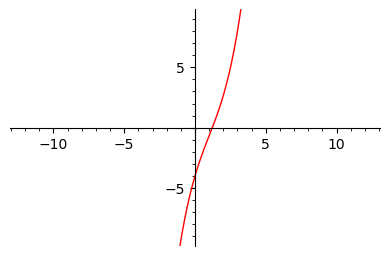

In [6]:
desolvep(de,y)

**EX:** Resolva $y'' + 2y' + y = (2+t)e^{-t}$

'A solução geral y(t) da equação é: '

1/6*(t^3 + 6*t^2)*e^(-t) + (_K2*t + _K1)*e^(-t)

'Pelo método de Variação dos Parâmetros'

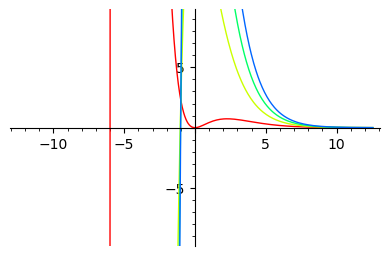

In [7]:
de = d2 + 2*d1 + y == (2+t)*e^(-t)
desolvep(de,y)

**EX:** Resolva $y'' +2y'+2y = e^t cos(t)$

'A solução geral y(t) da equação é: '

(_K2*cos(t) + _K1*sin(t))*e^(-t) + 1/8*cos(t)*e^t + 1/8*e^t*sin(t)

'Pelo método de Variação dos Parâmetros'

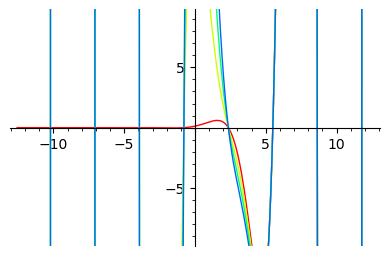

In [8]:
desolvep(d2+2*d1+2*y==e^(t)*cos(t),y,10000)